In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [30]:
def change_directory(path):
    print("Current Working Directory ", os.getcwd())
    os.chdir(path)
    print("Changed Working Directory ", os.getcwd())

In [31]:
def read_data(file):
    data = pd.read_csv(file)
    return data

In [32]:
def cross_tab(data):
    res = data['cyberbullying_type'].value_counts().rename_axis('cyberbullying_type').reset_index(name='counts')
    res['percentage'] = (res['counts']/sum(res['counts'])) * 100
    return res

In [33]:
def frequency_plot(res):
    x = res['cyberbullying_type']
    y = res['counts']
    plt.figure(figsize=(11,4))
    plt.bar(x,y,color='violet')
    plt.title('Target Label Vs Frequency')
    plt.xlabel('Target Label')
    plt.ylabel('Frequency')
    plt.show()

In [34]:
def polarity_score(x):
    sentiment = ""
    polarity = round(TextBlob(x).sentiment.polarity,4)
    if polarity > 0:
        sentiment = "positive"
    elif polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment, polarity

In [47]:
def polarity_summary(data):
    summary = data.groupby(['cyberbullying_type','sentiment']).agg(count_sentiment = ('sentiment','count'),
                                                     average_polarity = ('polarity_score','mean')
                                                    ).reset_index()
    return summary

In [35]:
path = "C:\\Users\\ompra\\OneDrive\\Documents\\Machine Learning Projects\\Automated Decision Support System for Cyberbullying Detection - Version 2.0\\Data\\raw_data"
change_directory(path)

Current Working Directory  C:\Users\ompra\OneDrive\Documents\Machine Learning Projects\Automated Decision Support System for Cyberbullying Detection - Version 2.0\Data\raw_data
Changed Working Directory  C:\Users\ompra\OneDrive\Documents\Machine Learning Projects\Automated Decision Support System for Cyberbullying Detection - Version 2.0\Data\raw_data


In [36]:
file = 'integrated_cyberbullying_data.csv'
data = read_data(file)
data.head()

,text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [37]:
res = cross_tab(data)
res

,cyberbullying_type,counts,percentage
0,other_cyberbullying,19484,29.592953
1,not_cyberbullying,14432,21.919806
2,religion,7998,12.147631
3,age,7992,12.138518
4,gender,7973,12.109660
5,ethnicity,7961,12.091434


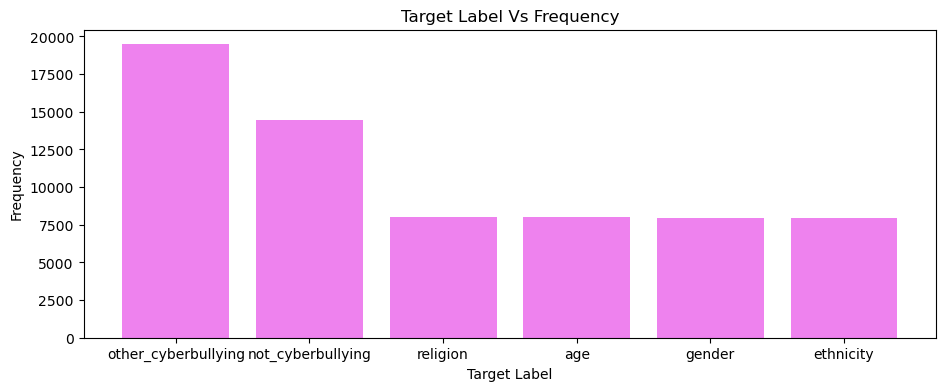

In [38]:
frequency_plot(res)

In [39]:
data['sentiment'], data['polarity_score'] = zip(*data['text'].apply(polarity_score))
data.head()

,text,cyberbullying_type,sentiment,polarity_score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,negative,-0.1562
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,neutral,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,positive,0.2000
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,positive,0.1500
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,neutral,0.0000


In [48]:
summary = polarity_summary(data)
summary.head(10)

,cyberbullying_type,sentiment,count_sentiment,average_polarity
0,age,negative,2469,-0.184919
1,age,neutral,724,0.000000
2,age,positive,4799,0.190796
3,ethnicity,negative,6250,-0.305595
4,ethnicity,neutral,253,0.000000
5,ethnicity,positive,1458,0.175491
6,gender,negative,2182,-0.268621
7,gender,neutral,1487,0.000000
8,gender,positive,4304,0.274973
9,not_cyberbullying,negative,3138,-0.286316
